<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [32]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import seaborn as sns

from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
!pip install -U selenium chromedriver


Requirement already up-to-date: selenium in /Users/Inceptive/anaconda3/lib/python3.7/site-packages (3.141.0)
Requirement already up-to-date: chromedriver in /Users/Inceptive/anaconda3/lib/python3.7/site-packages (2.24.1)


## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
# In the Lecture notebook theres like 400 txt files, just do like 10 or so data science ones, build a loop
# and be able to do this assignment on all those.
# at the end, can even work with some gensim and word 2 vector 
import urllib.request
page = urllib.request.urlopen('https://www.indeed.com/jobs?q=Data+Science&l=United+States').read()

In [23]:
# Mimicking the Click


In [39]:
driver = webdriver.Chrome("/Users/Inceptive/Desktop/chromedriver")

df = pd.DataFrame(columns = ['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description' ])

driver.get('https://www.indeed.com/jobs?q=data+scientist&l=United+States')
driver.implicitly_wait(20)

all_jobs = driver.find_elements_by_class_name('result')

for job in all_jobs:
    result_html = job.get_attribute('innerHTML')
    soup = BeautifulSoup(result_html, 'html.parser')

    try:
        title = soup.find("a", class_='jobtitle').text.replace('\n', '')
    except:
        title = 'None'

    try:
        location = soup.find(class_='location').text
    except:
        location = 'None'    

    try:
        company = soup.find(class_='company').text.replace('\n', '').strip()
    except:
        company = 'None' 

    try:
        salary = soup.find(class_='salary').text.replace('\n', '').strip()
    except:
        salary = 'None'

    try:
        sponsored = soup.find(class_='sponsoredGray').text
        sponsored = 'Sponsored'
    except:
        sponsored = 'Organic'

    sum_div = job.find_elements_by_class_name('summary')[0]
    try:
        sum_div.click()
    except:
        close_button = driver.find_elements_by_class_name('popover-x-button-close')[0]
        close_button.click()
        sum_div.click()
    job_desc = driver.find_element_by_id('vjs-desc').text

    df = df.append({'Title':title, 
                        'Location':location, 
                        'Company':company, 
                        'Salary':salary, 
                        'Sponsored':sponsored, 
                        'Description':job_desc}, ignore_index=True)
    
    print("Got these many results:",df.shape)

        
df.to_csv('datascience_jobs.csv',index=False)

Got these many results: (1, 6)
Got these many results: (2, 6)
Got these many results: (3, 6)
Got these many results: (4, 6)


IndexError: list index out of range

In [ ]:
jobs_df = pd.read_csv('datascience_jobs.csv')

## 2) Use Spacy to tokenize / clean the listings 

In [54]:
# bringing in the listing
df = pd.read_csv('job_listings.csv')
df['description'] = df['description'].str.lower()
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>job requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>job description<br/>\n<br/>\n<p>as a da...,Data Scientist I
2,2,b'<div><p>as a data scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-jobmetadataheader icl-...",Data Scientist
4,4,b'<ul><li>location: usa \xe2\x80\x93 multiple ...,Data Scientist


In [55]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [56]:
# seeing an example of a description
df['tokens'] = df['description'].apply(tokenize)


In [57]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>job requirements:</div><ul><li><p>...",Data scientist,"[bdivdivjob, requirementsdivullipnconceptual, ..."
1,1,b'<div>job description<br/>\n<br/>\n<p>as a da...,Data Scientist I,"[bdivjob, descriptionbrnbrnpas, a, data, scien..."
2,2,b'<div><p>as a data scientist you will be work...,Data Scientist - Entry Level,"[bdivpas, a, data, scientist, you, will, be, w..."
3,3,"b'<div class=""jobsearch-jobmetadataheader icl-...",Data Scientist,"[bdiv, classjobsearchjobmetadataheader, icluxs..."
4,4,b'<ul><li>location: usa \xe2\x80\x93 multiple ...,Data Scientist,"[bullilocation, usa, xe2x80x93, multiple, loca..."


In [58]:
text = df['description']
vect = CountVectorizer()
vect.fit(text)
dtm = vect.transform(text)

In [59]:
feature_names = vect.get_feature_names()
print(feature_names)

['00', '000', '02115', '03', '0356', '04', '057', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million', '36', '36

In [60]:
type(feature_names)

list

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [61]:
# Using the Count Functions from yesterday's lecture
import spacy
nlp = spacy.load('en_core_web_lg')

def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos!= 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas     

In [62]:
df['tokens'] = df['description'].apply(get_lemmas)

In [63]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [64]:
wc = count(df['tokens'])

In [65]:
wc = wc[wc['count'] < 2000]

In [66]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,work,377,1496,5.0,0.009862,0.125584,0.884977
78,experience,390,1458,6.0,0.009612,0.135196,0.915493
263,team,361,1208,7.0,0.007964,0.143159,0.847418
332,business,320,1178,8.0,0.007766,0.150925,0.751174
270,data,348,976,9.0,0.006434,0.157359,0.816901
29,science,333,932,10.0,0.006144,0.163503,0.781690
212,product,270,822,11.0,0.005419,0.168922,0.633803
515,analytic,250,771,12.0,0.005083,0.174005,0.586854
15,model,269,721,13.0,0.004753,0.178758,0.631455
23,machine,278,703,14.0,0.004634,0.183393,0.652582


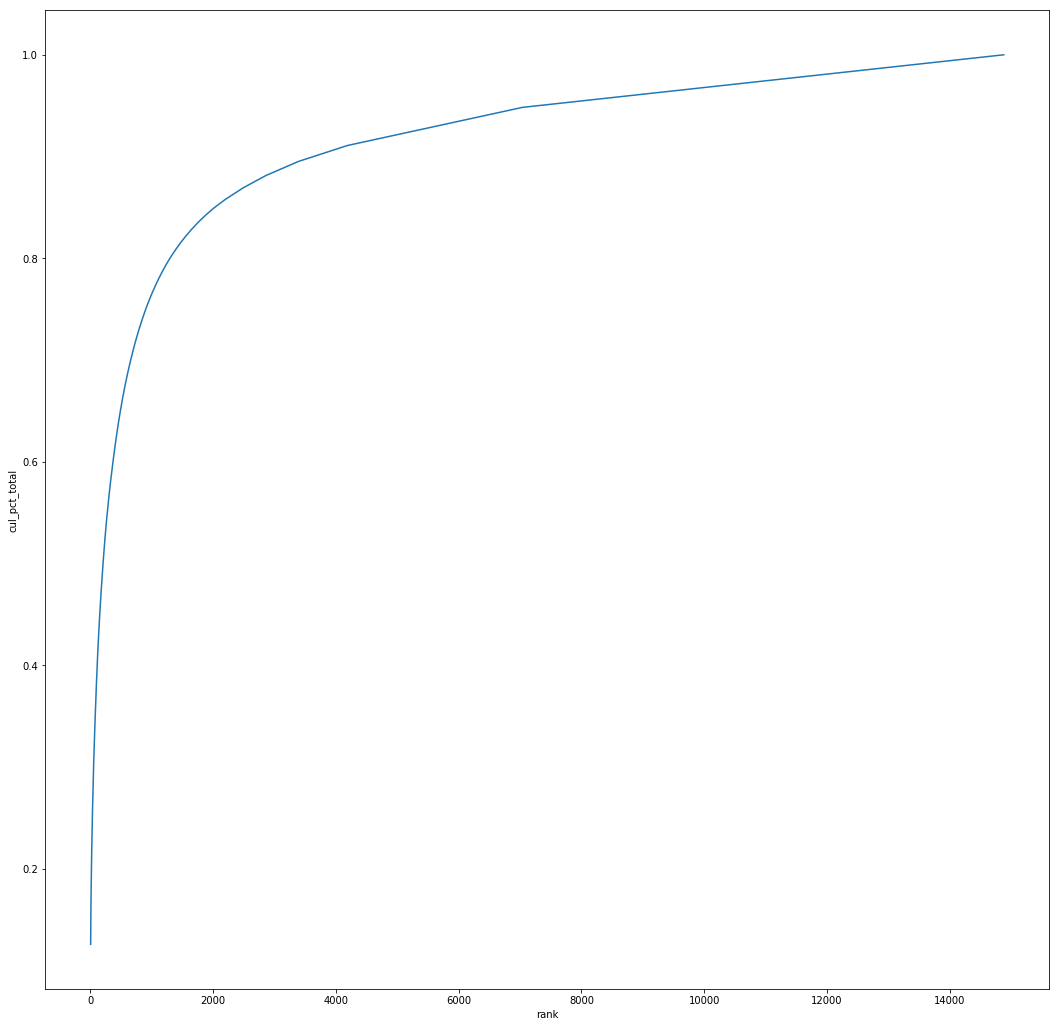

In [67]:
sns.lineplot(x='rank', y= 'cul_pct_total', data = wc)

In [68]:
# Add stop words like work, 

## 4) Visualize the most common word counts

In [69]:
import squarify
import matplotlib.pyplot as plt

wc_most_common = wc[wc['count'] > 180]
wc_most_common.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,work,377,1496,5.0,0.009862,0.125584,0.884977
78,experience,390,1458,6.0,0.009612,0.135196,0.915493
263,team,361,1208,7.0,0.007964,0.143159,0.847418
332,business,320,1178,8.0,0.007766,0.150925,0.751174
270,data,348,976,9.0,0.006434,0.157359,0.816901
29,science,333,932,10.0,0.006144,0.163503,0.781690
212,product,270,822,11.0,0.005419,0.168922,0.633803
515,analytic,250,771,12.0,0.005083,0.174005,0.586854
15,model,269,721,13.0,0.004753,0.178758,0.631455
23,machine,278,703,14.0,0.004634,0.183393,0.652582


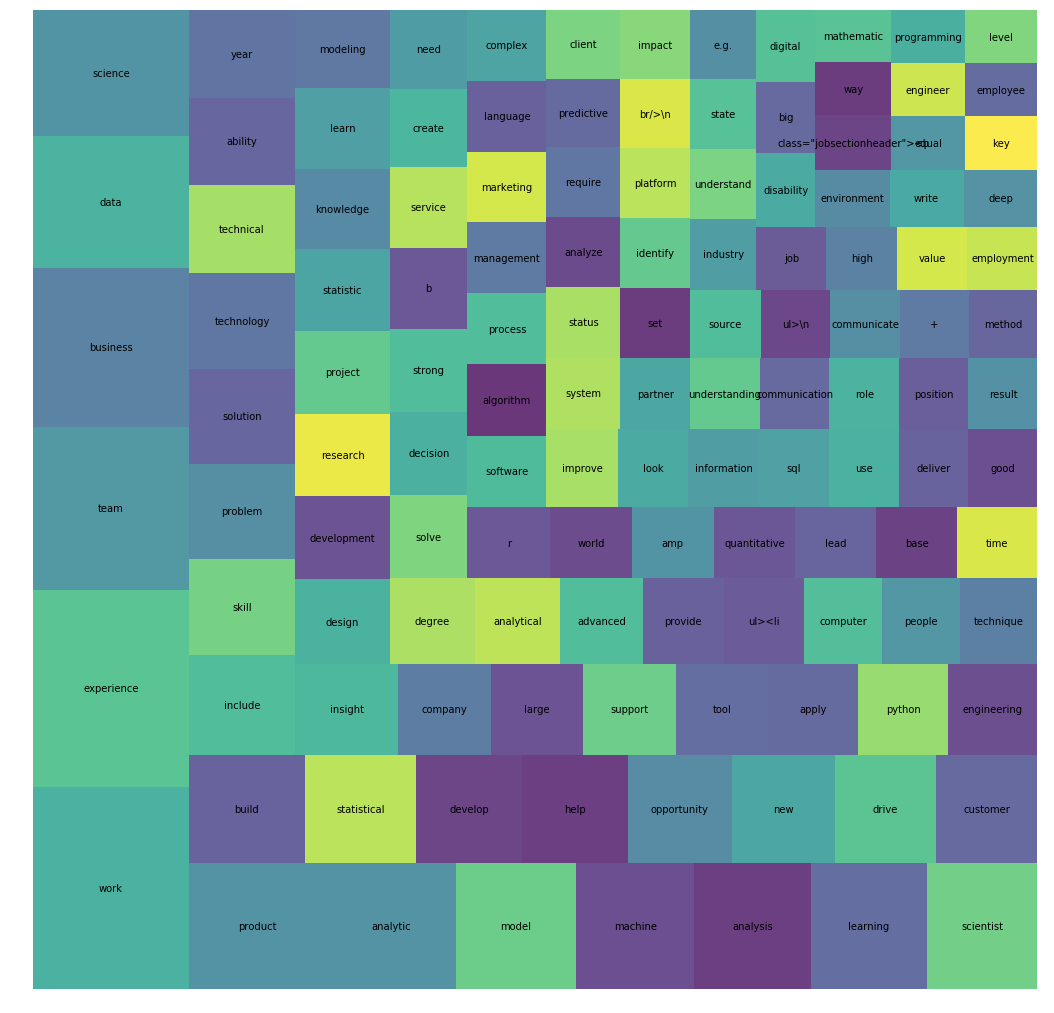

In [70]:
from matplotlib.pyplot import figure
wc_most_common = wc[wc['count'] > 180]

squarify.plot(sizes=wc_most_common['pct_total'], label=wc_most_common['word'], alpha=.8)
plt.axis('off')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size
plt.show()

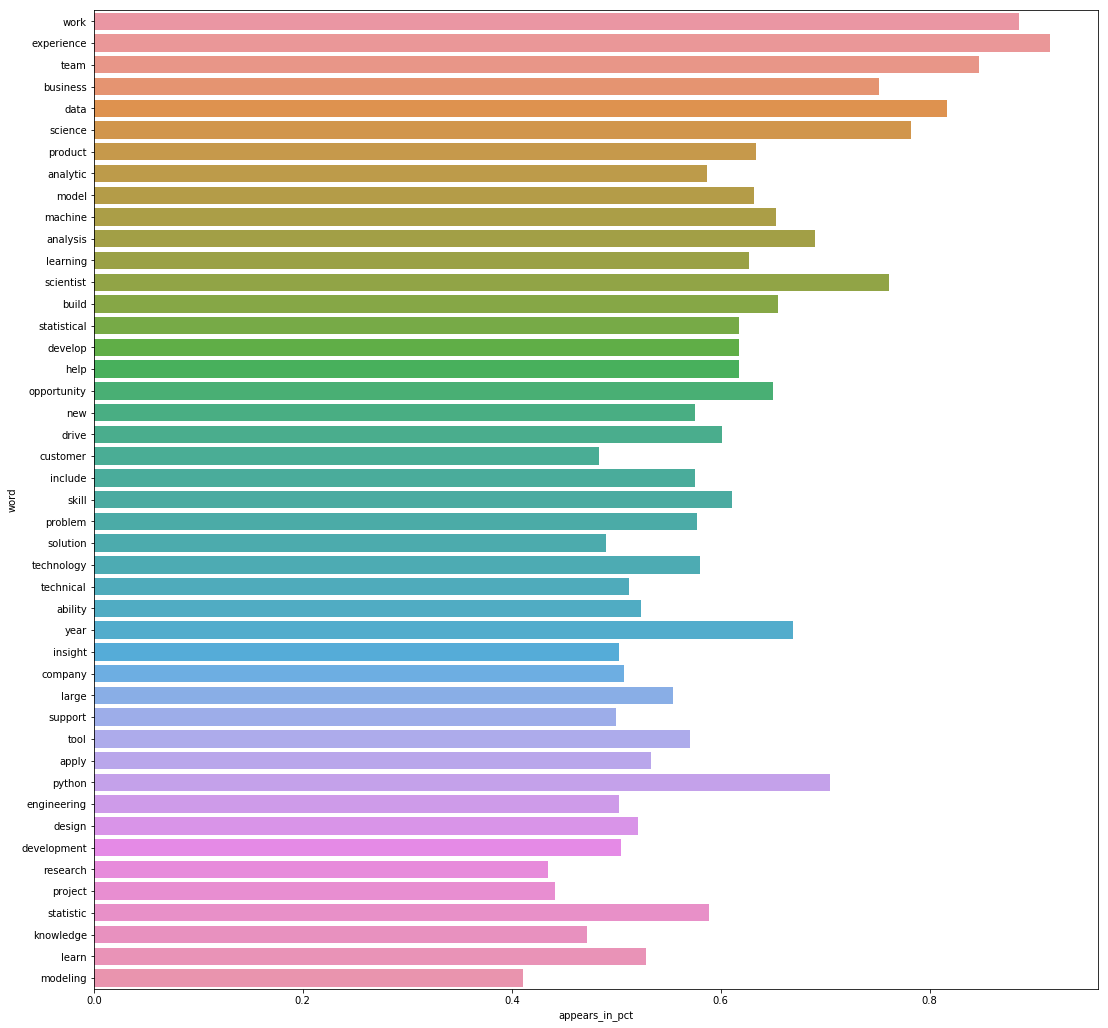

In [71]:

wc_most_common = wc[wc['count'] > 350]

sns.barplot(x='appears_in_pct', y='word', data = wc_most_common)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(text)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0356,04,057,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.095122,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [73]:
# Instantiate
from sklearn.neighbors import NearestNeighbors


# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=15, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=15, p=2, radius=1.0)

In [74]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[7]])

# the first line is the fistance, so for those ones that are zero, or any that are exact matches
# those are vey liekly repeats 

# so from here, that second array are the most simliar 15 jobs to the iloc in the line above 

(array([[0.        , 0.        , 1.15443906, 1.16450406, 1.16947775,
         1.16954513, 1.1705803 , 1.1705803 , 1.17492736, 1.17550752,
         1.17565122, 1.17622761, 1.1766712 , 1.1766712 , 1.17688992]]),
 array([[  7,  18, 307, 326, 201, 384, 202,  80, 387, 341, 217, 406, 119,
         177, 410]]))

In [75]:
df['description'].iloc[7]

'b"everytown for gun safety, the nation\'s largest gun violence prevention advocacy group, is seeking a data scientist. the research department studies how gun violence occurs in america and identifies the best policies and interventions to prevent and address it. in this role, the data scientist will need to understand and communicate about the various types of gun violence, who it impacts, and how it impacts different communities and populations differently. you must be committed to addressing gun violence in diverse communities around the country.\\n<br/><br/>\\nthe data scientist will be the policy data lead for the organization, responsible for advanced data management, analysis, and visualization. the data scientist reports to the principal researcher.\\n<br/><br/>\\n<b>we\'ll trust you to take on the following responsibilities:</b><br/>\\n<ul>\\n<li>serve as the lead data analyst on the team, responsible for the accuracy and appropriate use of all calculations and findings</li>\

In [76]:
df['description'].iloc[307]

"b'<div>job description<br/>\\n<br/>\\n<p>toomey technologies has immediate openings for talented and motivated data scientists in northern virginia.</p><p>\\nour solutions require integrated models based on large and varied datasets, feeding analytic applications so that we can extract patterns and behaviors obscured within the data to augment the capabilities of human operators. we need data scientists/software engineers of all experience levels to staff positions supporting the defense and intelligence communities. this is a unique position where you will not only analyze the data, but also integrate your algorithms and visualizations into production systems. the data scientist will be working on a project to leverage commercial and open source data streams fused with classified intelligence to increase indications and warning (i&amp;w) data and to provide automated resource allocation and response options to include support for object detection. the data scientist will work as part

In [ ]:
# so from here, scrape the listings and create the ideal FANG job qualifications statement

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 